In [107]:
import sys  
sys.path.insert(1, '..')

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

This script analyse this association rules find in the fifth version

In [109]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv5.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit5_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'SapHana'}),0.034783,0.030435,0.021739,0.625000,20.535714,0.020681,2.585507,1,1
1,frozenset({'SapHana'}),frozenset({'Firebird'}),0.030435,0.034783,0.021739,0.714286,20.535714,0.020681,3.378261,1,1
2,frozenset({'Informix'}),frozenset({'Firebird'}),0.043478,0.034783,0.030435,0.700000,20.125000,0.028922,3.217391,1,1
3,frozenset({'Firebird'}),frozenset({'Informix'}),0.034783,0.043478,0.030435,0.875000,20.125000,0.028922,7.652174,1,1
4,frozenset({'Couchbase'}),frozenset({'Neo4j'}),0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
5,frozenset({'Neo4j'}),frozenset({'Couchbase'}),0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
6,frozenset({'Informix'}),frozenset({'SapHana'}),0.043478,0.030435,0.021739,0.500000,16.428571,0.020416,1.939130,1,1
7,frozenset({'SapHana'}),frozenset({'Informix'}),0.030435,0.043478,0.021739,0.714286,16.428571,0.020416,3.347826,1,1
8,frozenset({'SapHana'}),frozenset({'SAP Adaptive Server'}),0.030435,0.043478,0.021739,0.714286,16.428571,0.020416,3.347826,1,1
9,frozenset({'SAP Adaptive Server'}),frozenset({'SapHana'}),0.043478,0.030435,0.021739,0.500000,16.428571,0.020416,1.939130,1,1


In [110]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [111]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,0.030435,0.021739,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,0.034783,0.021739,0.714286,20.535714,0.020681,3.378261,1,1
2,Informix,Firebird,0.043478,0.034783,0.030435,0.700000,20.125000,0.028922,3.217391,1,1
3,Firebird,Informix,0.034783,0.043478,0.030435,0.875000,20.125000,0.028922,7.652174,1,1
4,Couchbase,Neo4j,0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
5,Neo4j,Couchbase,0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,0.030435,0.021739,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,0.043478,0.021739,0.714286,16.428571,0.020416,3.347826,1,1
8,SapHana,SAP Adaptive Server,0.030435,0.043478,0.021739,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,0.030435,0.021739,0.500000,16.428571,0.020416,1.939130,1,1


In [112]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
3,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
4,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,SapHana,SAP Adaptive Server,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1


In [113]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
3,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
4,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,SapHana,SAP Adaptive Server,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [114]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
230,PostgreSQL,MySQL,0.334783,78.339130,0.456522,106.826087,0.291304,68.165217,0.870130,1.905999,0.138469,4.184783,1,1
231,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1,1
282,H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54.939130,0.692308,1.516484,0.079962,1.766304,1,1
283,MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54.939130,0.514286,1.516484,0.079962,1.360614,1,1
243,MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48.834783,0.457143,1.782082,0.091588,1.369565,1,1
183,Oracle,PostgreSQL,0.256522,60.026087,0.334783,78.339130,0.208696,48.834783,0.813559,2.430112,0.122817,3.567984,1,1
182,PostgreSQL,Oracle,0.334783,78.339130,0.256522,60.026087,0.208696,48.834783,0.623377,2.430112,0.122817,1.974063,1,1
242,Oracle,MySQL,0.256522,60.026087,0.456522,106.826087,0.208696,48.834783,0.813559,1.782082,0.091588,2.915020,1,1
244,PostgreSQL,H2,0.334783,78.339130,0.339130,79.356522,0.200000,46.800000,0.597403,1.761572,0.086465,1.641515,1,1
245,H2,PostgreSQL,0.339130,79.356522,0.334783,78.339130,0.200000,46.800000,0.589744,1.761572,0.086465,1.621467,1,1


In [115]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.120356,28.163241,0.095059,22.243874,0.208225,1.816869,0.040114,1.147098,1.0,1.0
H2,0.339130,79.356522,0.138406,32.386957,0.085507,20.008696,0.252137,2.104553,0.038570,1.200118,1.0,1.0
PostgreSQL,0.334783,78.339130,0.125889,29.458103,0.089328,20.902767,0.266824,2.307815,0.047183,1.360983,1.0,1.0
HyperSQL,0.273913,64.095652,0.142512,33.347826,0.077053,18.030435,0.281305,2.413630,0.038017,1.263525,1.0,1.0
Oracle,0.256522,60.026087,0.138444,32.395881,0.081465,19.062700,0.317574,2.792796,0.045951,1.477545,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
MS SQL Server,0.178261,41.713043,0.142563,33.359725,0.068650,16.064073,0.385109,3.345324,0.043236,3.410417,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
IBM DB2,0.121739,28.486957,0.155243,36.326854,0.059335,13.884399,0.487395,4.604730,0.040436,NaN,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [116]:
rules1 = df2[(df2['consequent support'] >= 0.10)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.120356,28.163241,0.456522,106.826087,0.095059,22.243874,0.829440,1.816869,0.040114,NaN,1.0,1.0
PostgreSQL,0.125889,29.458103,0.334783,78.339130,0.089328,20.902767,0.772616,2.307815,0.047183,NaN,1.0,1.0
H2,0.138406,32.386957,0.339130,79.356522,0.085507,20.008696,0.713718,2.104553,0.038570,NaN,1.0,1.0
Oracle,0.138444,32.395881,0.256522,60.026087,0.081465,19.062700,0.716413,2.792796,0.045951,NaN,1.0,1.0
HyperSQL,0.142512,33.347826,0.273913,64.095652,0.077053,18.030435,0.661125,2.413630,0.038017,NaN,1.0,1.0
MS SQL Server,0.142563,33.359725,0.178261,41.713043,0.068650,16.064073,0.596340,3.345324,0.043236,2.847964,1.0,1.0
MongoDB,0.174203,40.763478,0.169565,39.678261,0.063478,14.853913,0.479914,2.830261,0.033940,2.336337,1.0,1.0
Redis,0.173333,40.560000,0.182609,42.730435,0.062609,14.650435,0.472542,2.587729,0.030957,2.179592,1.0,1.0
IBM DB2,0.155243,36.326854,0.121739,28.486957,0.059335,13.884399,0.560576,4.604730,0.040436,NaN,1.0,1.0


In [117]:
rules1c = df2.groupby(['antecedents','consequents']).sum().sort_values(['support'], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  \
antecedents            consequents                                  
MySQL                  PostgreSQL                        0.456522   
PostgreSQL             MySQL                             0.334783   
H2                     MySQL                             0.339130   
MySQL                  H2                                0.456522   
Oracle                 PostgreSQL                        0.256522   
                       MySQL                             0.256522   
MySQL                  Oracle                            0.456522   
PostgreSQL             Oracle                            0.334783   
                       H2                                0.334783   
H2                     PostgreSQL                        0.339130   
HyperSQL               MySQL                             0.273913   
MySQL                  HyperSQL                          0.456522   
HyperSQL               PostgreSQL                        0.273913   
PostgreSQL             HyperSQL                          0.334783   
MS SQL Server          PostgreSQL                        0.178261   
PostgreSQL             MS SQL Server                     0.334783   
MySQL                  MS SQL Server                     0.456522   
MS SQL Server          MySQL                             0.178261   
H2                     Oracle                            0.339130   
Oracle                 H2                                0.256522   
                       HyperSQL                          0.256522   
                       MS SQL Server                     0.256522   
HyperSQL               Oracle                            0.273913   
H2                     HyperSQL                          0.339130   
HyperSQL               H2                                0.273913   
MS SQL Server          Oracle                            0.178261   
MySQL                  MongoDB                           0.456522   
                       Redis                             0.456522   
H2                     MS SQL Server                     0.339130   
MongoDB                MySQL                             0.169565   
MS SQL Server          H2                                0.178261   
Redis                  MySQL                             0.182609   
PostgreSQL             IBM DB2                           0.334783   
IBM DB2                PostgreSQL                        0.121739   
                       MySQL                             0.121739   
MySQL                  IBM DB2                           0.456522   
Oracle                 IBM DB2                           0.256522   
IBM DB2                Oracle                            0.121739   
HyperSQL               MS SQL Server                     0.273913   
MS SQL Server          HyperSQL                          0.178261   
MongoDB                PostgreSQL                        0.169565   
PostgreSQL             Redis                             0.334783   
Redis                  PostgreSQL                        0.182609   
PostgreSQL             MongoDB                           0.334783   
Redis                  MongoDB                           0.182609   
MongoDB                Redis                             0.169565   
MS SQL Server          IBM DB2                           0.178261   
H2                     Redis                             0.339130   
                       MongoDB                           0.339130   
MongoDB                H2                                0.169565   
IBM DB2                MS SQL Server                     0.121739   
Redis                  H2                                0.182609   
IBM DB2                H2                                0.121739   
H2                     IBM DB2                           0.339130   
HyperSQL               IBM DB2                           0.273913   
IBM DB2                HyperSQL                          0.121739   
Cassandra              MySQL                 

In [118]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv5.xlsx', index=False)

In [119]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  \
antecedents            consequents                                  
MySQL                  PostgreSQL                        0.456522   
H2                     MySQL                             0.339130   
Oracle                 PostgreSQL                        0.256522   
                       MySQL                             0.256522   
PostgreSQL             H2                                0.334783   
HyperSQL               MySQL                             0.273913   
                       PostgreSQL                        0.273913   
MS SQL Server          PostgreSQL                        0.178261   
MySQL                  MS SQL Server                     0.456522   
H2                     Oracle                            0.339130   
Oracle                 HyperSQL                          0.256522   
                       MS SQL Server                     0.256522   
H2                     HyperSQL                          0.339130   
MySQL                  MongoDB                           0.456522   
                       Redis                             0.456522   
H2                     MS SQL Server                     0.339130   
PostgreSQL             IBM DB2                           0.334783   
IBM DB2                MySQL                             0.121739   
Oracle                 IBM DB2                           0.256522   
HyperSQL               MS SQL Server                     0.273913   
MongoDB                PostgreSQL                        0.169565   
PostgreSQL             Redis                             0.334783   
Redis                  MongoDB                           0.182609   
MS SQL Server          IBM DB2                           0.178261   
H2                     Redis                             0.339130   
                       MongoDB                           0.339130   
IBM DB2                H2                                0.121739   
HyperSQL               IBM DB2                           0.273913   
Cassandra              MySQL                             0.091304   
                       Redis                             0.091304   
HyperSQL               Redis                             0.273913   
Cassandra              MongoDB                           0.091304   
MongoDB                Oracle                            0.169565   
Cassandra              PostgreSQL                        0.091304   
MS SQL Server          MongoDB                           0.178261   
MySQL                  SQLite                            0.456522   
PostgreSQL             SQLite                            0.334783   
MongoDB                HyperSQL                          0.169565   
Oracle                 SQLite                            0.256522   
SQLite                 H2                                0.095652   
Oracle                 Redis                             0.256522   
HyperSQL               SQLite                            0.273913   
DynamoDB               MySQL                             0.091304   
MS SQL Server          Redis                             0.178261   
PostgreSQL             DynamoDB                          0.334783   
MySQL                  HBase                             0.456522   
                       Google Cloud Datastore            0.456522   
Cassandra              H2                                0.091304   
SQLite                 MS SQL Server                     0.095652   
IBM DB2                SQLite                            0.121739   
PostgreSQL             Google Cloud Datastore            0.334783   
Oracle                 Cassandra                         0.256522   
Redis                  DynamoDB                          0.182609   
DynamoDB               Cassandra                         0.091304   
Cassandra              MS SQL Server                     0.091304   
Informix               HyperSQL                          0.043478   
                       H2                    

In [120]:
rules1c

antecedent support  \
antecedents            consequents                                  
MySQL                  PostgreSQL                        0.456522   
H2                     MySQL                             0.339130   
Oracle                 PostgreSQL                        0.256522   
                       MySQL                             0.256522   
PostgreSQL             H2                                0.334783   
HyperSQL               MySQL                             0.273913   
                       PostgreSQL                        0.273913   
MS SQL Server          PostgreSQL                        0.178261   
MySQL                  MS SQL Server                     0.456522   
H2                     Oracle                            0.339130   
Oracle                 HyperSQL                          0.256522   
                       MS SQL Server                     0.256522   
H2                     HyperSQL                          0.339130   
MySQL                  MongoDB                           0.456522   
                       Redis                             0.456522   
H2                     MS SQL Server                     0.339130   
PostgreSQL             IBM DB2                           0.334783   
IBM DB2                MySQL                             0.121739   
Oracle                 IBM DB2                           0.256522   
HyperSQL               MS SQL Server                     0.273913   
MongoDB                PostgreSQL                        0.169565   
PostgreSQL             Redis                             0.334783   
Redis                  MongoDB                           0.182609   
MS SQL Server          IBM DB2                           0.178261   
H2                     Redis                             0.339130   
                       MongoDB                           0.339130   
IBM DB2                H2                                0.121739   
HyperSQL               IBM DB2                           0.273913   
Cassandra              MySQL                             0.091304   
                       Redis                             0.091304   
HyperSQL               Redis                             0.273913   
Cassandra              MongoDB                           0.091304   
MongoDB                Oracle                            0.169565   
Cassandra              PostgreSQL                        0.091304   
MS SQL Server          MongoDB                           0.178261   
MySQL                  SQLite                            0.456522   
PostgreSQL             SQLite                            0.334783   
MongoDB                HyperSQL                          0.169565   
Oracle                 SQLite                            0.256522   
SQLite                 H2                                0.095652   
Oracle                 Redis                             0.256522   
HyperSQL               SQLite                            0.273913   
DynamoDB               MySQL                             0.091304   
MS SQL Server          Redis                             0.178261   
PostgreSQL             DynamoDB                          0.334783   
MySQL                  HBase                             0.456522   
                       Google Cloud Datastore            0.456522   
Cassandra              H2                                0.091304   
SQLite                 MS SQL Server                     0.095652   
IBM DB2                SQLite                            0.121739   
PostgreSQL             Google Cloud Datastore            0.334783   
Oracle                 Cassandra                         0.256522   
Redis                  DynamoDB                          0.182609   
DynamoDB               Cassandra                         0.091304   
Cassandra              MS SQL Server                     0.091304   
Informix               HyperSQL                          0.043478   
                       H2                    

In [121]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1,1
1,H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54.939130,0.692308,1.516484,0.079962,1.766304,1,1
2,Oracle,PostgreSQL,0.256522,60.026087,0.334783,78.339130,0.208696,48.834783,0.813559,2.430112,0.122817,3.567984,1,1
3,Oracle,MySQL,0.256522,60.026087,0.456522,106.826087,0.208696,48.834783,0.813559,1.782082,0.091588,2.915020,1,1
4,PostgreSQL,H2,0.334783,78.339130,0.339130,79.356522,0.200000,46.800000,0.597403,1.761572,0.086465,1.641515,1,1
5,HyperSQL,MySQL,0.273913,64.095652,0.456522,106.826087,0.191304,44.765217,0.698413,1.529856,0.066257,1.802059,1,1
6,HyperSQL,PostgreSQL,0.273913,64.095652,0.334783,78.339130,0.178261,41.713043,0.650794,1.943929,0.086560,1.904941,1,1
7,MS SQL Server,PostgreSQL,0.178261,41.713043,0.334783,78.339130,0.173913,40.695652,0.975610,2.914159,0.114234,27.273913,1,1
8,MySQL,MS SQL Server,0.456522,106.826087,0.178261,41.713043,0.169565,39.678261,0.371429,2.083624,0.088185,1.307312,1,1
9,H2,Oracle,0.339130,79.356522,0.256522,60.026087,0.156522,36.626087,0.461538,1.799218,0.069527,1.380745,1,1


This chart shows all the rules for the BDs used together in fifth version.

In [122]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width=1000, height =1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [123]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
#order


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68,0.638095,1.905999,0.138469,1.838101,1,1
8,MySQL,MS SQL Server,0.456522,106.826087,0.178261,41.713043,0.169565,39,0.371429,2.083624,0.088185,1.307312,1,1
13,MySQL,MongoDB,0.456522,106.826087,0.169565,39.678261,0.126087,29,0.276190,1.628816,0.048677,1.147311,1,1
14,MySQL,Redis,0.456522,106.826087,0.182609,42.730435,0.126087,29,0.276190,1.512472,0.042722,1.129291,1,1
35,MySQL,SQLite,0.456522,106.826087,0.095652,22.382609,0.069565,16,0.152381,1.593074,0.025898,1.066927,1,1
65,MySQL,SAP Adaptive Server,0.456522,106.826087,0.043478,10.173913,0.039130,9,0.085714,1.971429,0.019282,1.046196,1,1
62,MySQL,Informix,0.456522,106.826087,0.043478,10.173913,0.039130,9,0.085714,1.971429,0.019282,1.046196,1,1
63,MySQL,MS Access,0.456522,106.826087,0.039130,9.156522,0.039130,9,0.085714,2.190476,0.021267,1.050951,1,1
85,MySQL,Teradata,0.456522,106.826087,0.034783,8.139130,0.034783,8,0.076190,2.190476,0.018904,1.044823,1,1
81,MySQL,Firebird,0.456522,106.826087,0.034783,8.139130,0.034783,8,0.076190,2.190476,0.018904,1.044823,1,1


In [124]:
#if you need to generate the rules in excel
rules_filter = orules1c.to_excel('rules_filtersv5_order.xlsx', index=False)

In [125]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd = orules1cd.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68,0.638095,1.905999,0.138469,1.838101,1,1
1,H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54,0.692308,1.516484,0.079962,1.766304,1,1
3,Oracle,MySQL,0.256522,60.026087,0.456522,106.826087,0.208696,48,0.813559,1.782082,0.091588,2.915020,1,1
2,Oracle,PostgreSQL,0.256522,60.026087,0.334783,78.339130,0.208696,48,0.813559,2.430112,0.122817,3.567984,1,1
4,PostgreSQL,H2,0.334783,78.339130,0.339130,79.356522,0.200000,46,0.597403,1.761572,0.086465,1.641515,1,1
5,HyperSQL,MySQL,0.273913,64.095652,0.456522,106.826087,0.191304,44,0.698413,1.529856,0.066257,1.802059,1,1
6,HyperSQL,PostgreSQL,0.273913,64.095652,0.334783,78.339130,0.178261,41,0.650794,1.943929,0.086560,1.904941,1,1
7,MS SQL Server,PostgreSQL,0.178261,41.713043,0.334783,78.339130,0.173913,40,0.975610,2.914159,0.114234,27.273913,1,1
8,MySQL,MS SQL Server,0.456522,106.826087,0.178261,41.713043,0.169565,39,0.371429,2.083624,0.088185,1.307312,1,1
9,H2,Oracle,0.339130,79.356522,0.256522,60.026087,0.156522,36,0.461538,1.799218,0.069527,1.380745,1,1


In [126]:
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot2 = orules1cd.pivot(index='Consequents', columns='Antecedents', values='support_abs')
pivot_filled = pivot.combine_first(pivot2)

pivot_filled

,MySQL,H2,Oracle,PostgreSQL,HyperSQL,MS SQL Server,IBM DB2,MongoDB,Redis,Cassandra,SQLite,DynamoDB,SAP Adaptive Server,Informix,MS Access,Teradata,Firebird,HBase,Hazelcast,Couchbase,SapHana,Neo4j,Google Cloud Datastore
Antecedents,,,,,,,,,,,,,,,,,,,,,,,
MySQL,NaN,54.0,48.0,68.0,44.0,39.0,27.0,29.0,29.0,19.0,16.0,14.0,9.0,9.0,9.0,8.0,8.0,12.0,6.0,8.0,7.0,7.0,12.0
H2,54.0,NaN,36.0,46.0,35.0,29.0,21.0,22.0,22.0,12.0,15.0,NaN,9.0,10.0,8.0,7.0,8.0,8.0,NaN,NaN,6.0,6.0,NaN
Oracle,48.0,36.0,NaN,48.0,35.0,35.0,26.0,17.0,15.0,11.0,15.0,7.0,10.0,9.0,9.0,8.0,8.0,NaN,NaN,6.0,7.0,6.0,NaN
PostgreSQL,68.0,46.0,48.0,NaN,41.0,40.0,28.0,24.0,24.0,17.0,16.0,12.0,10.0,9.0,8.0,8.0,8.0,9.0,6.0,7.0,7.0,6.0,11.0
HyperSQL,44.0,35.0,35.0,41.0,NaN,25.0,20.0,16.0,18.0,9.0,15.0,NaN,9.0,10.0,8.0,7.0,8.0,5.0,8.0,NaN,6.0,NaN,NaN
MS SQL Server,39.0,29.0,35.0,40.0,25.0,NaN,22.0,16.0,13.0,10.0,11.0,7.0,8.0,8.0,5.0,7.0,7.0,NaN,NaN,6.0,6.0,6.0,NaN
IBM DB2,27.0,21.0,26.0,28.0,20.0,22.0,NaN,9.0,9.0,7.0,11.0,NaN,10.0,9.0,6.0,6.0,8.0,NaN,NaN,NaN,7.0,6.0,NaN
MongoDB,29.0,22.0,17.0,24.0,16.0,16.0,9.0,NaN,23.0,17.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,NaN,7.0,7.0
Redis,29.0,22.0,15.0,24.0,18.0,13.0,9.0,23.0,NaN,18.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,7.0,7.0,NaN,6.0,7.0


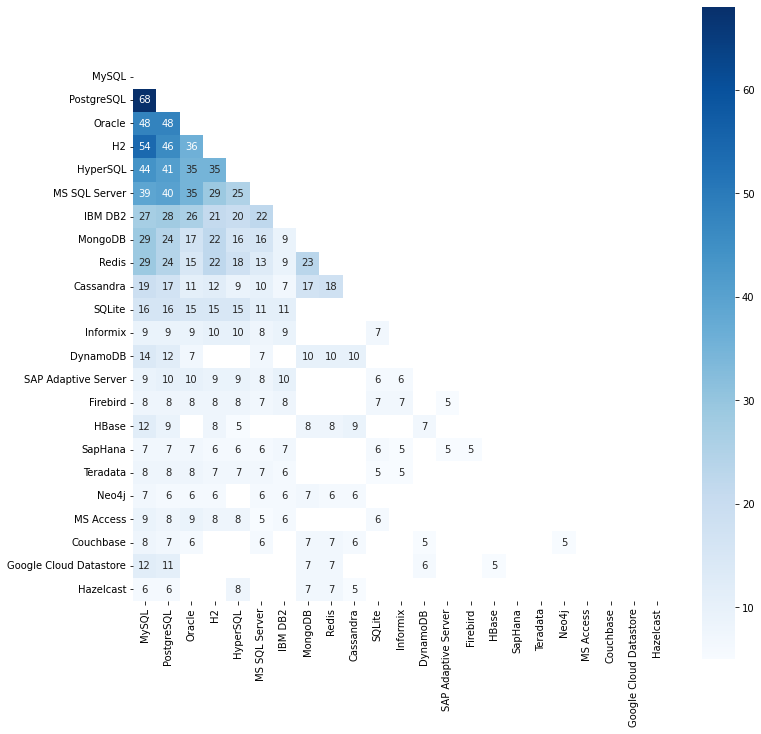

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ordena as linhas (Antecedents) para que as maiores somas venham primeiro
ordered_rows = pivot_filled.sum(axis=1).sort_values(ascending=False).index  # Ordena as linhas

# Ordena as colunas (Consequents) para que as maiores somas venham primeiro
ordered_cols = pivot_filled.sum(axis=0).sort_values(ascending=False).index  # Ordena as colunas

# Reordena a tabela pivotada tanto pelas linhas quanto pelas colunas
pivot_ordered = pivot_filled.loc[ordered_rows, ordered_cols]

# Cria a máscara para o triângulo superior na matriz reordenada
mask_lower = np.triu(np.ones(pivot_ordered.shape), k=0)

# Configura o heatmap com a tabela reordenada
sns.heatmap(
    pivot_ordered, 
    mask=mask_lower, 
    xticklabels=True, 
    yticklabels=True, 
    annot=True, 
    cmap=sns.color_palette("Blues", as_cmap=True), 
    square=True
)
plt.ylabel("")
# Ajusta o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Salva o gráfico em um arquivo PDF
plt.savefig(IMAGES_DIR + "/heat_onlyrules_v5.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [128]:
#Calcular o total de BDs
num_unicos = orules1cd['Antecedents'].nunique()
#print(num_unicos)

colunas_unicas = orules1cd['Consequents'].nunique()
#print(colunas_unicas)

intersecao = set(orules1cd['Antecedents']).intersection(orules1cd['Consequents'])
tam_intersecao = len(intersecao)
#print(tam_intersecao)

dif1 = num_unicos - tam_intersecao
dif2 = colunas_unicas - tam_intersecao
Total = dif1 + dif2 + tam_intersecao

print(Total)

23


import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 

#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs','antecedent_sup_abs'], ascending=[False, False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"]) 
#fig.title('Correlation of the most frequent databases')
fig.show()


In [129]:
#Test to understand how the pivot function transforms the dataframe
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot.columns
#Invertendo a posição dos BDs
pivot = pivot.iloc[::-1]
pivot = pivot.reset_index()
pivot

consequents,antecedents,MySQL,H2,Oracle,PostgreSQL,HyperSQL,MS SQL Server,IBM DB2,MongoDB,Redis,Cassandra,SQLite,DynamoDB,SAP Adaptive Server,Informix,MS Access,Teradata,Firebird,HBase,Hazelcast,Couchbase,SapHana,Neo4j,Google Cloud Datastore
0,Google Cloud Datastore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,Neo4j,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SapHana,NaN,6.0,7.0,NaN,6.0,6.0,NaN,NaN,NaN,NaN,6.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Couchbase,NaN,NaN,6.0,NaN,NaN,6.0,NaN,7.0,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4,Hazelcast,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HBase,NaN,8.0,NaN,NaN,5.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Firebird,NaN,8.0,8.0,NaN,NaN,7.0,8.0,NaN,NaN,NaN,7.0,NaN,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
7,Teradata,NaN,7.0,NaN,8.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MS Access,NaN,NaN,9.0,8.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Informix,NaN,10.0,NaN,NaN,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#Test generating the graph with all the rules ordered with the function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1cd['support_abs'] = orules1cd['support_abs'].astype(int)

fig = px.scatter(orules1cd, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [131]:
#Test showing the rules without inverted repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [132]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support'], ascending=[False])
rules1c

antecedent support  \
antecedents            consequents                                  
MySQL                  PostgreSQL                        0.456522   
PostgreSQL             MySQL                             0.334783   
H2                     MySQL                             0.339130   
MySQL                  H2                                0.456522   
Oracle                 PostgreSQL                        0.256522   
                       MySQL                             0.256522   
MySQL                  Oracle                            0.456522   
PostgreSQL             Oracle                            0.334783   
                       H2                                0.334783   
H2                     PostgreSQL                        0.339130   
HyperSQL               MySQL                             0.273913   
MySQL                  HyperSQL                          0.456522   
HyperSQL               PostgreSQL                        0.273913   
PostgreSQL             HyperSQL                          0.334783   
MS SQL Server          PostgreSQL                        0.178261   
PostgreSQL             MS SQL Server                     0.334783   
MySQL                  MS SQL Server                     0.456522   
MS SQL Server          MySQL                             0.178261   
H2                     Oracle                            0.339130   
Oracle                 H2                                0.256522   
                       HyperSQL                          0.256522   
                       MS SQL Server                     0.256522   
HyperSQL               Oracle                            0.273913   
H2                     HyperSQL                          0.339130   
HyperSQL               H2                                0.273913   
MS SQL Server          Oracle                            0.178261   
MySQL                  MongoDB                           0.456522   
                       Redis                             0.456522   
H2                     MS SQL Server                     0.339130   
MongoDB                MySQL                             0.169565   
MS SQL Server          H2                                0.178261   
Redis                  MySQL                             0.182609   
PostgreSQL             IBM DB2                           0.334783   
IBM DB2                PostgreSQL                        0.121739   
                       MySQL                             0.121739   
MySQL                  IBM DB2                           0.456522   
Oracle                 IBM DB2                           0.256522   
IBM DB2                Oracle                            0.121739   
HyperSQL               MS SQL Server                     0.273913   
MS SQL Server          HyperSQL                          0.178261   
MongoDB                PostgreSQL                        0.169565   
PostgreSQL             Redis                             0.334783   
Redis                  PostgreSQL                        0.182609   
PostgreSQL             MongoDB                           0.334783   
Redis                  MongoDB                           0.182609   
MongoDB                Redis                             0.169565   
MS SQL Server          IBM DB2                           0.178261   
H2                     Redis                             0.339130   
                       MongoDB                           0.339130   
MongoDB                H2                                0.169565   
IBM DB2                MS SQL Server                     0.121739   
Redis                  H2                                0.182609   
IBM DB2                H2                                0.121739   
H2                     IBM DB2                           0.339130   
HyperSQL               IBM DB2                           0.273913   
IBM DB2                HyperSQL                          0.121739   
Cassandra              MySQL                 

In [133]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.120356,28.163241,0.456522,106.826087,0.095059,22.243874,0.829440,1.816869,0.040114,NaN,1.0,1.0
PostgreSQL,0.125889,29.458103,0.334783,78.339130,0.089328,20.902767,0.772616,2.307815,0.047183,NaN,1.0,1.0
H2,0.138406,32.386957,0.339130,79.356522,0.085507,20.008696,0.713718,2.104553,0.038570,NaN,1.0,1.0
Oracle,0.138444,32.395881,0.256522,60.026087,0.081465,19.062700,0.716413,2.792796,0.045951,NaN,1.0,1.0
HyperSQL,0.142512,33.347826,0.273913,64.095652,0.077053,18.030435,0.661125,2.413630,0.038017,NaN,1.0,1.0
MS SQL Server,0.142563,33.359725,0.178261,41.713043,0.068650,16.064073,0.596340,3.345324,0.043236,2.847964,1.0,1.0
MongoDB,0.174203,40.763478,0.169565,39.678261,0.063478,14.853913,0.479914,2.830261,0.033940,2.336337,1.0,1.0
Redis,0.173333,40.560000,0.182609,42.730435,0.062609,14.650435,0.472542,2.587729,0.030957,2.179592,1.0,1.0
IBM DB2,0.155243,36.326854,0.121739,28.486957,0.059335,13.884399,0.560576,4.604730,0.040436,NaN,1.0,1.0


In [134]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.120356,28.163241,0.095059,22.243874,0.208225,1.816869,0.040114,1.147098,1.0,1.0
PostgreSQL,0.334783,78.339130,0.125889,29.458103,0.089328,20.902767,0.266824,2.307815,0.047183,1.360983,1.0,1.0
H2,0.339130,79.356522,0.138406,32.386957,0.085507,20.008696,0.252137,2.104553,0.038570,1.200118,1.0,1.0
Oracle,0.256522,60.026087,0.138444,32.395881,0.081465,19.062700,0.317574,2.792796,0.045951,1.477545,1.0,1.0
HyperSQL,0.273913,64.095652,0.142512,33.347826,0.077053,18.030435,0.281305,2.413630,0.038017,1.263525,1.0,1.0
MS SQL Server,0.178261,41.713043,0.142563,33.359725,0.068650,16.064073,0.385109,3.345324,0.043236,3.410417,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
IBM DB2,0.121739,28.486957,0.155243,36.326854,0.059335,13.884399,0.487395,4.604730,0.040436,NaN,1.0,1.0


In [135]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.043)]  
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.120356,28.163241,0.095059,22.243874,0.208225,1.816869,0.040114,1.147098,1.0,1.0
PostgreSQL,0.334783,78.339130,0.125889,29.458103,0.089328,20.902767,0.266824,2.307815,0.047183,1.360983,1.0,1.0
H2,0.339130,79.356522,0.138406,32.386957,0.085507,20.008696,0.252137,2.104553,0.038570,1.200118,1.0,1.0
Oracle,0.256522,60.026087,0.138444,32.395881,0.081465,19.062700,0.317574,2.792796,0.045951,1.477545,1.0,1.0
HyperSQL,0.273913,64.095652,0.142512,33.347826,0.077053,18.030435,0.281305,2.413630,0.038017,1.263525,1.0,1.0
MS SQL Server,0.178261,41.713043,0.142563,33.359725,0.068650,16.064073,0.385109,3.345324,0.043236,3.410417,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
IBM DB2,0.121739,28.486957,0.155243,36.326854,0.059335,13.884399,0.487395,4.604730,0.040436,NaN,1.0,1.0


In [136]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
197,Teradata,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
198,MS Access,MySQL,0.039130,9.156522,0.456522,106.826087,0.039130,9.156522,1.000000,2.190476,0.021267,inf,1,1
201,Firebird,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
203,SapHana,MySQL,0.030435,7.121739,0.456522,106.826087,0.030435,7.121739,1.000000,2.190476,0.016541,inf,1,1
205,Couchbase,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
211,IBM DB2,MySQL,0.121739,28.486957,0.456522,106.826087,0.117391,27.469565,0.964286,2.112245,0.061815,15.217391,1,1
214,MS SQL Server,MySQL,0.178261,41.713043,0.456522,106.826087,0.169565,39.678261,0.951220,2.083624,0.088185,11.141304,1,1
221,Cassandra,MySQL,0.091304,21.365217,0.456522,106.826087,0.082609,19.330435,0.904762,1.981859,0.040926,5.706522,1,1
223,SAP Adaptive Server,MySQL,0.043478,10.173913,0.456522,106.826087,0.039130,9.156522,0.900000,1.971429,0.019282,5.434783,1,1
225,Informix,MySQL,0.043478,10.173913,0.456522,106.826087,0.039130,9.156522,0.900000,1.971429,0.019282,5.434783,1,1


In [137]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
125,SapHana,PostgreSQL,0.030435,7.121739,0.334783,78.339130,0.030435,7.121739,1.000000,2.987013,0.020246,inf,1,1
126,Firebird,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
128,SAP Adaptive Server,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.043478,10.173913,1.000000,2.987013,0.028922,inf,1,1
131,Teradata,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
133,IBM DB2,PostgreSQL,0.121739,28.486957,0.334783,78.339130,0.121739,28.486957,1.000000,2.987013,0.080983,inf,1,1
146,MS SQL Server,PostgreSQL,0.178261,41.713043,0.334783,78.339130,0.173913,40.695652,0.975610,2.914159,0.114234,27.273913,1,1
159,Informix,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.039130,9.156522,0.900000,2.688312,0.024575,6.652174,1,1
164,MS Access,PostgreSQL,0.039130,9.156522,0.334783,78.339130,0.034783,8.139130,0.888889,2.655123,0.021682,5.986957,1,1
170,Couchbase,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.030435,7.121739,0.875000,2.613636,0.018790,5.321739,1,1
183,Oracle,PostgreSQL,0.256522,60.026087,0.334783,78.339130,0.208696,48.834783,0.813559,2.430112,0.122817,3.567984,1,1


In [138]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
134,Informix,H2,0.043478,10.173913,0.33913,79.356522,0.043478,10.173913,1.000000,2.948718,0.028733,inf,1,1
138,Firebird,H2,0.034783,8.139130,0.33913,79.356522,0.034783,8.139130,1.000000,2.948718,0.022987,inf,1,1
166,SAP Adaptive Server,H2,0.043478,10.173913,0.33913,79.356522,0.039130,9.156522,0.900000,2.653846,0.024386,6.608696,1,1
169,MS Access,H2,0.039130,9.156522,0.33913,79.356522,0.034783,8.139130,0.888889,2.621083,0.021512,5.947826,1,1
177,Teradata,H2,0.034783,8.139130,0.33913,79.356522,0.030435,7.121739,0.875000,2.580128,0.018639,5.286957,1,1
178,SapHana,H2,0.030435,7.121739,0.33913,79.356522,0.026087,6.104348,0.857143,2.527473,0.015766,4.626087,1,1
192,IBM DB2,H2,0.121739,28.486957,0.33913,79.356522,0.091304,21.365217,0.750000,2.211538,0.050019,2.643478,1,1
194,Neo4j,H2,0.034783,8.139130,0.33913,79.356522,0.026087,6.104348,0.750000,2.211538,0.014291,2.643478,1,1
213,MS SQL Server,H2,0.178261,41.713043,0.33913,79.356522,0.126087,29.504348,0.707317,2.085679,0.065633,2.257971,1,1


In [139]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
89,SapHana,Oracle,0.030435,7.121739,0.256522,60.026087,0.030435,7.121739,1.000000,3.898305,0.022628,inf,1,1
90,MS Access,Oracle,0.039130,9.156522,0.256522,60.026087,0.039130,9.156522,1.000000,3.898305,0.029093,inf,1,1
93,Firebird,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
95,SAP Adaptive Server,Oracle,0.043478,10.173913,0.256522,60.026087,0.043478,10.173913,1.000000,3.898305,0.032325,inf,1,1
97,Teradata,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
105,IBM DB2,Oracle,0.121739,28.486957,0.256522,60.026087,0.113043,26.452174,0.928571,3.619855,0.081815,10.408696,1,1
106,Informix,Oracle,0.043478,10.173913,0.256522,60.026087,0.039130,9.156522,0.900000,3.508475,0.027977,7.434783,1,1
108,MS SQL Server,Oracle,0.178261,41.713043,0.256522,60.026087,0.152174,35.608696,0.853659,3.327821,0.106446,5.080435,1,1
140,Neo4j,Oracle,0.034783,8.139130,0.256522,60.026087,0.026087,6.104348,0.750000,2.923729,0.017164,2.973913,1,1
142,Couchbase,Oracle,0.034783,8.139130,0.256522,60.026087,0.026087,6.104348,0.750000,2.923729,0.017164,2.973913,1,1


In [140]:
#rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
60,Firebird,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.030435,7.121739,0.875000,4.908537,0.024234,6.573913,1,1
61,Teradata,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.030435,7.121739,0.875000,4.908537,0.024234,6.573913,1,1
62,SapHana,MS SQL Server,0.030435,7.121739,0.178261,41.713043,0.026087,6.104348,0.857143,4.808362,0.020662,5.752174,1,1
73,Informix,MS SQL Server,0.043478,10.173913,0.178261,41.713043,0.034783,8.139130,0.800000,4.487805,0.027032,4.108696,1,1
74,SAP Adaptive Server,MS SQL Server,0.043478,10.173913,0.178261,41.713043,0.034783,8.139130,0.800000,4.487805,0.027032,4.108696,1,1
77,IBM DB2,MS SQL Server,0.121739,28.486957,0.178261,41.713043,0.095652,22.382609,0.785714,4.407666,0.073951,3.834783,1,1
78,Neo4j,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.026087,6.104348,0.750000,4.207317,0.019887,3.286957,1,1
81,Couchbase,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.026087,6.104348,0.750000,4.207317,0.019887,3.286957,1,1


In [141]:
rules7 =df[ (df['consequents'] .str.contains('MariaDB'))  & (df['confidence'] > 0.4) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [142]:
rules8 = df[ (df['consequents'].str.contains('Redis')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
67,Couchbase,Redis,0.034783,8.139130,0.182609,42.730435,0.030435,7.121739,0.875000,4.791667,0.024083,6.539130,1,1
71,Cassandra,Redis,0.091304,21.365217,0.182609,42.730435,0.078261,18.313043,0.857143,4.693878,0.061588,5.721739,1,1
84,Neo4j,Redis,0.034783,8.139130,0.182609,42.730435,0.026087,6.104348,0.750000,4.107143,0.019735,3.269565,1,1
99,Hazelcast,Redis,0.043478,10.173913,0.182609,42.730435,0.030435,7.121739,0.700000,3.833333,0.022495,2.724638,1,1


In [143]:
#rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [144]:
#rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10 = df[ (df['consequents'].str.contains('IBM DB2')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
23,SapHana,IBM DB2,0.030435,7.121739,0.121739,28.486957,0.030435,7.121739,1.00,8.214286,0.026730,inf,1,1
25,Firebird,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.034783,8.139130,1.00,8.214286,0.030548,inf,1,1
26,SAP Adaptive Server,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.043478,10.173913,1.00,8.214286,0.038185,inf,1,1
31,Informix,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.039130,9.156522,0.90,7.392857,0.033837,8.782609,1,1
45,Teradata,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.026087,6.104348,0.75,6.160714,0.021853,3.513043,1,1
47,Neo4j,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.026087,6.104348,0.75,6.160714,0.021853,3.513043,1,1


In [145]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MongoDB')) & (df['confidence'] > 0.5) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
54,Neo4j,MongoDB,0.034783,8.139130,0.169565,39.678261,0.030435,7.121739,0.875000,5.160256,0.024537,6.643478,1,1
56,Couchbase,MongoDB,0.034783,8.139130,0.169565,39.678261,0.030435,7.121739,0.875000,5.160256,0.024537,6.643478,1,1
69,Cassandra,MongoDB,0.091304,21.365217,0.169565,39.678261,0.073913,17.295652,0.809524,4.774115,0.058431,4.359783,1,1
83,Hazelcast,MongoDB,0.043478,10.173913,0.169565,39.678261,0.030435,7.121739,0.700000,4.128205,0.023062,2.768116,1,1
114,Redis,MongoDB,0.182609,42.730435,0.169565,39.678261,0.100000,23.400000,0.547619,3.229548,0.069036,1.835698,1,1


In [146]:
rules12 = df[ (df['consequents'] .str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
16,Firebird,SQLite,0.034783,8.139130,0.095652,22.382609,0.030435,7.121739,0.875000,9.147727,0.027108,7.234783,1,1
19,SapHana,SQLite,0.030435,7.121739,0.095652,22.382609,0.026087,6.104348,0.857143,8.961039,0.023176,6.330435,1,1
33,Informix,SQLite,0.043478,10.173913,0.095652,22.382609,0.030435,7.121739,0.700000,7.318182,0.026276,3.014493,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [147]:
rules7a = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules7a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [148]:
rules3a = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules3a = df2[(df2['consequents'].str.contains('PostGIS'))]
rules3a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [149]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [150]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [151]:
rulesTeste = df[ (df['consequents'] .str.contains('Teradata')) & (df['confidence'] > 0.5) ]
rulesTeste

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [152]:
rulesSAP = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rulesSAP

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
8,SapHana,SAP Adaptive Server,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
10,Firebird,SAP Adaptive Server,0.034783,8.139130,0.043478,10.173913,0.021739,5.086957,0.625000,14.375000,0.020227,2.550725,1,1
11,SAP Adaptive Server,Firebird,0.043478,10.173913,0.034783,8.139130,0.021739,5.086957,0.500000,14.375000,0.020227,1.930435,1,1
14,Informix,SAP Adaptive Server,0.043478,10.173913,0.043478,10.173913,0.026087,6.104348,0.600000,13.800000,0.024197,2.391304,1,1
15,SAP Adaptive Server,Informix,0.043478,10.173913,0.043478,10.173913,0.026087,6.104348,0.600000,13.800000,0.024197,2.391304,1,1
26,SAP Adaptive Server,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.043478,10.173913,1.000000,8.214286,0.038185,inf,1,1
27,IBM DB2,SAP Adaptive Server,0.121739,28.486957,0.043478,10.173913,0.043478,10.173913,0.357143,8.214286,0.038185,1.487923,1,1
40,SQLite,SAP Adaptive Server,0.095652,22.382609,0.043478,10.173913,0.026087,6.104348,0.272727,6.272727,0.021928,1.315217,1,1
41,SAP Adaptive Server,SQLite,0.043478,10.173913,0.095652,22.382609,0.026087,6.104348,0.600000,6.272727,0.021928,2.260870,1,1


In [153]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL')))] #& (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
124,PostgreSQL,SapHana,0.334783,78.339130,0.030435,7.121739,0.030435,7.121739,0.090909,2.987013,0.020246,1.066522,1,1
125,SapHana,PostgreSQL,0.030435,7.121739,0.334783,78.339130,0.030435,7.121739,1.000000,2.987013,0.020246,inf,1,1
126,Firebird,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
127,PostgreSQL,SAP Adaptive Server,0.334783,78.339130,0.043478,10.173913,0.043478,10.173913,0.129870,2.987013,0.028922,1.099286,1,1
128,SAP Adaptive Server,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.043478,10.173913,1.000000,2.987013,0.028922,inf,1,1
129,PostgreSQL,Firebird,0.334783,78.339130,0.034783,8.139130,0.034783,8.139130,0.103896,2.987013,0.023138,1.077127,1,1
130,PostgreSQL,Teradata,0.334783,78.339130,0.034783,8.139130,0.034783,8.139130,0.103896,2.987013,0.023138,1.077127,1,1
131,Teradata,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
132,PostgreSQL,IBM DB2,0.334783,78.339130,0.121739,28.486957,0.121739,28.486957,0.363636,2.987013,0.080983,1.380124,1,1
133,IBM DB2,PostgreSQL,0.121739,28.486957,0.334783,78.339130,0.121739,28.486957,1.000000,2.987013,0.080983,inf,1,1


In [154]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
125,SapHana,PostgreSQL,0.030435,7.121739,0.334783,78.339130,0.030435,7.121739,1.000000,2.987013,0.020246,inf,1,1
126,Firebird,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
128,SAP Adaptive Server,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.043478,10.173913,1.000000,2.987013,0.028922,inf,1,1
131,Teradata,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
133,IBM DB2,PostgreSQL,0.121739,28.486957,0.334783,78.339130,0.121739,28.486957,1.000000,2.987013,0.080983,inf,1,1
146,MS SQL Server,PostgreSQL,0.178261,41.713043,0.334783,78.339130,0.173913,40.695652,0.975610,2.914159,0.114234,27.273913,1,1
159,Informix,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.039130,9.156522,0.900000,2.688312,0.024575,6.652174,1,1
164,MS Access,PostgreSQL,0.039130,9.156522,0.334783,78.339130,0.034783,8.139130,0.888889,2.655123,0.021682,5.986957,1,1
170,Couchbase,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.030435,7.121739,0.875000,2.613636,0.018790,5.321739,1,1
183,Oracle,PostgreSQL,0.256522,60.026087,0.334783,78.339130,0.208696,48.834783,0.813559,2.430112,0.122817,3.567984,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [155]:
#Top 10 rules with highest lifts in the Middle of the project life cycle
rules13 = df2[(df2['lift'] > 10)] #>20
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
3,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
4,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,SapHana,SAP Adaptive Server,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1


rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

In [156]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
23,SapHana,IBM DB2,0.030435,7.121739,0.121739,28.486957,0.030435,7.121739,1.000000,8.214286,0.026730,inf,1,1
26,SAP Adaptive Server,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.043478,10.173913,1.000000,8.214286,0.038185,inf,1,1
25,Firebird,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.034783,8.139130,1.000000,8.214286,0.030548,inf,1,1
31,Informix,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.039130,9.156522,0.900000,7.392857,0.033837,8.782609,1,1
89,SapHana,Oracle,0.030435,7.121739,0.256522,60.026087,0.030435,7.121739,1.000000,3.898305,0.022628,inf,1,1
90,MS Access,Oracle,0.039130,9.156522,0.256522,60.026087,0.039130,9.156522,1.000000,3.898305,0.029093,inf,1,1
93,Firebird,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
95,SAP Adaptive Server,Oracle,0.043478,10.173913,0.256522,60.026087,0.043478,10.173913,1.000000,3.898305,0.032325,inf,1,1
97,Teradata,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
101,Informix,HyperSQL,0.043478,10.173913,0.273913,64.095652,0.043478,10.173913,1.000000,3.650794,0.031569,inf,1,1


In [157]:
rules14 = df2[(df2['lift'] > 2)] #>20(['support_abs'], ascending=[False])
#rules14 = rules14.sort_values(['lift'], ascending=['False'])
pd.set_option('display.max_rows', None)     # Exibe todas as linhas
pd.set_option('display.max_columns', None) 
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
3,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
4,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,SapHana,SAP Adaptive Server,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
9,SAP Adaptive Server,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1


In [158]:
#rules14_filter = rules14.to_excel('rules_filters_liftv5.xlsx', index=False)

In [159]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)